# TRABAJO PRÁCTICO ENTREGABLE - PARTE I

### INTEGRANTES DEL GRUPO IV:
*   María Belén Acotto
*   Elías Ferreyra
*   Juan Ignacio Barrionuevo Galtier
*   Oscar Alejandro Oviedo
*   Gonzalo Heredia Edelstein

### CONSIGNAS
**RESPONDER**:¿Cuáles son los lenguajes de programación asociados a los mejores salarios?


**RESUMEN**: Para responder, se realiza una adecuación de los datos crudos, se analizan y procesan. 
Se trabaja principalmente con las variables "salary_monthly" y se correlacionan con los lenguajes de programación.

## Carga de Datos

In [1]:
#Importo librerias
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

seaborn.set_context('talk')

In [2]:
# El siguiente código setea la variable de pandas para poder ver todas las columnas
pd.set_option('display.max_columns', None)

# link URL
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
# generación del DataFrame (df) de trabajo
df = pd.read_csv(url)

## Pre-Análisis

In [3]:
print('Información sobre las columnas del DATASET\n')

df.info()

Información sobre las columnas del DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   profile_gender                                6095 non-null   object 
 1   profile_age                                   6095 non-null   int64  
 2   work_country                                  6095 non-null   object 
 3   work_province                                 6095 non-null   object 
 4   profile_years_experience                      6095 non-null   float64
 5   work_years_in_company                         6095 non-null   float64
 6   work_years_in_current_position                6095 non-null   float64
 7   work_people_in_charge_of                      6095 non-null   int64  
 8   profile_studies_level                         6095 non-null   object 
 9   profile_studies_lev

Como podemos observar, tenemos **48 columnas**, con tres tipos de datos:
* float
* int
* object

### Primera vista de los datos

In [4]:
df.head()

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,Licenciatura en Sistemas,UNNE Universidad Nacional del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Docker, Linux, OpenStack, VMWare, Windows Server","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress","Microsoft SQL Server, MySQL",PHPUnit,"Eclipse, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,102000.0,NaN,3,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,106000.0,NaN,1,1,Menos de un sueldo,Performance individual,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


### Mapa de Calor para análisis lijero sobre correlatividad entre columnas

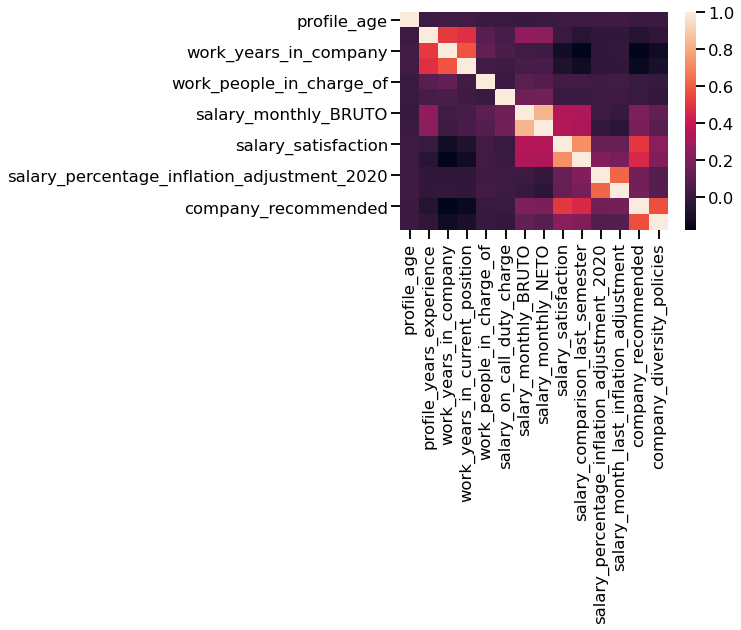

In [5]:
#Agrego mapa de calor
seaborn.heatmap(df.corr());

#### Observaciones

> * La diagonal principal está en colores más claros (mejor correlatividad) ya que es 1, lo cual nos centramos en las columnas con colores más claros, excluyendo la matriz identidad.

### Análisis de correlatividad sobre la variable de salary_monthly_BRUTO.

In [6]:
corr = df.corr()
corr[['salary_monthly_BRUTO']].sort_values(by = 'salary_monthly_BRUTO',ascending = False)\
.style.background_gradient()

,salary_monthly_BRUTO
salary_monthly_BRUTO,1.000000
salary_monthly_NETO,0.833335
salary_satisfaction,0.344676
salary_comparison_last_semester,0.331435
profile_years_experience,0.250545
company_recommended,0.196381
salary_on_call_duty_charge,0.149794
company_diversity_policies,0.115718
work_people_in_charge_of,0.101176
work_years_in_current_position,0.039366


#### Observaciones

> * Al ver los datos del dataset, las correlatividades de forma rápida, llegamos a tomar las siguientes columnas como columnas relevantes

In [7]:
# Columnas del DF relevantes para el analisis
relevant_columns = ['work_contract_type','work_role','tools_programming_languages','salary_monthly_BRUTO', 'salary_monthly_NETO',
                    'profile_years_experience','work_years_in_company','work_years_in_current_position','work_people_in_charge_of']

### Valores Nulos

In [8]:
# Cuantificación de datos vacios/NAN de columnas relevantes
print(len(df))
for s in relevant_columns:
  print(s,len(df[pd.isnull(df[s])]))

6095
work_contract_type 0
work_role 0
tools_programming_languages 1
salary_monthly_BRUTO 0
salary_monthly_NETO 212
profile_years_experience 0
work_years_in_company 0
work_years_in_current_position 0
work_people_in_charge_of 0


#### Observaciones

> * Dado los datos faltantes en la columna "salary_monthly_NETO", se trabajará con la variable "salary_monthly_BRUTO".

> * Se eliminará la fila faltante en "tools_programming_languages" y además, los que colocaron la opción "Ninguno" y otros datos que ensucian el dataset. Con esto solo se considera, aquellos que conocen algún programa.

## Primera Limpieza de Datos

In [ ]:
# Eliminación de la fila con el valor nulo
df = df[df['tools_programming_languages'].notnull()]

Rápidamente, vemos datos o lenguajes a considerar para ser eliminados.

In [ ]:
lenguajes = pd.DataFrame()
lenguajes['name'] = df.tools_programming_languages.str.split(',', expand=True).stack().to_list()
lenguajes['name'] = lenguajes['name'].str.strip()
lenguajes = lenguajes.drop_duplicates(subset=['name'])
lenguajes.sort_values(by='name')

Sacamos aquellos fáciles de identificar luego de varias pruebas

In [ ]:
df = df[~df.tools_programming_languages.str.lower().str.contains("ningun")==True]
df = df[~df.tools_programming_languages.str.lower().str.contains("aplica")==True]
df = df[~df.tools_programming_languages.str.lower().str.contains("no es")==True]
df = df[df.tools_programming_languages != '.']
df = df[df.tools_programming_languages != '-']

## Análisis y procesos sobre la variable "salary_monthly_BRUTO"

In [ ]:
max_SMB = 300000
sub_df = df[df["salary_monthly_BRUTO"] < max_SMB]
fig, ax = plt.subplots(figsize=(15,8))
seaborn.histplot(data=sub_df, x="salary_monthly_BRUTO", kde=True, bins=100, color='red', stat= 'density')
plt.xlabel('Salario Mensual Bruto')
plt.title('Análisis sobre \"salary_monthly_BRUTO\"',fontsize=16)
plt.show()

### Análisis

#### Observaciones

> * La dendidad muestra una función asimétrica, desplazada hacia valores más positivos. Es muy extendida, con valores de salario bruto muy altos. Por lo cual se filtrarán estos datos, utilizando el criterio del tercer cuartil (2.5 valores por encima). 


> * La densidad muestra un no esperable máximo local a bajo valores de salario (cercano a 0). Se filtrarán aquellos salarios menores a 1000 $AR.
Valor elegido aleatoriamente

### Filtrado de Datasets

#### Creación de funciones filtros

In [ ]:
# filtro valores
def clean_outliers_q3(dataset, column_name):
  # Returns dataset removing the outlier rows form columns @column_name
  interesting_col = dataset[column_name]
  # Here we can remove the outliers from both ends, or even add more restrictions.
  mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(.75)))
  return dataset[mask_outlier]

def clean_cero(dataset, column_name, val):
  interesting_col = dataset[column_name]
  mask_outlier = (interesting_col >= val)
  return dataset[mask_outlier]

#### Filtrar valores mínimos (ceros) y filtro con criterio del tercer cuartil

In [ ]:
salary_col = "salary_monthly_BRUTO"
valor = 1000.0
fig = plt.figure(figsize=(16, 8))
df_filtered = clean_outliers_q3(df, salary_col)
df_filtered2 = clean_cero(df_filtered, salary_col, valor)
seaborn.histplot(data=df_filtered2, x="salary_monthly_BRUTO", kde=True, bins=100, color='red', stat= 'density')
plt.title('Distribución del Salario Mensual Bruto (Filtrado)',fontsize=16)
plt.xlabel('Salario Mensual Bruto')
plt.show()

### Comparativa con una distribución Normal (Gausiana)

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(24,11))
seaborn.distplot(df_filtered2['salary_monthly_BRUTO'], fit = norm, ax=axes[0])
res = stats.probplot(df_filtered2['salary_monthly_BRUTO'], plot = plt)
fig.suptitle('Distribución Normal (Gausiana) - Salario Bruto', fontsize=16)
plt.show()

### Simulación de una distribucion normal:

Como no logramos una perfecta distribución normal, lo que optamos por hacer, fue calcular el logaritmo de nuestra variable "salary_monthly_BRUTO" y dibujar la normal de esta manera

In [ ]:
# Transformación de los datos para que parezca una distribucion normal:

df_filtered3 = np.log(df_filtered2['salary_monthly_BRUTO'])
fig, axes = plt.subplots(1, 2,figsize=(24,8))
seaborn.distplot(df_filtered3, fit = norm, ax=axes[0])
res = stats.probplot(df_filtered3, plot = plt)
fig.suptitle('Distribución Normal (Gausiana) - Logarítmo del Salario Bruto', fontsize=16)
plt.show()

#### Observaciones

> * Los datos filtrados y re-normalizados presentan una distribución normal. Sin embargo fuertes desviaciones todavía son observadas para valores pequeños de los salarios.

## Análisis y procesos sobre la variable "tools_programming_languages"

Descripciones sobre nuestra variable

In [ ]:
print(df_filtered2.salary_monthly_BRUTO.describe())
print('Mediana:', df_filtered2.salary_monthly_BRUTO.median())
print('Moda:',df_filtered2.salary_monthly_BRUTO.mode())

Nos concentramos sobre los valores que se encuentran dentro del cuarto cuartil, es decir, "los que ganan más"

In [ ]:
auxdf = df_filtered2["salary_monthly_BRUTO"]
fig = plt.figure(figsize=(12, 6))
seaborn.boxplot(auxdf, color='red')
plt.title('Disttribución Salario Bruto (Filtrado)',fontsize=16)
plt.show()

Función que nos ayuda a separar los distintos lenguajes de programación

In [ ]:
# Función que recorrerá una culumna, y nos separará los lenguajes agrupados
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  
  # Split string dentro de la lista de items y borramos las comas y espacios.
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]


In [ ]:
lenguajes = pd.DataFrame()
lenguajes['name'] = df.tools_programming_languages.str.split(',', expand=True).stack().to_list()
lenguajes['name'] = lenguajes['name'].str.strip()
lenguajes = lenguajes.drop_duplicates(subset=['name'])
lenguajes.sort_values(by='name')

Creamos una nueva columna dentro del dataset tratado con el lenguaje de programación

In [ ]:
# Create a new column with the list of languages
df_filtered2['cured_programming_languages'] = df_filtered2.tools_programming_languages.apply(split_languages).values
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# En esta sección, multiplicaremos cada fila por la cantidad de lenguajes que tiene cada usuario
# Para no duplicar información necesaria, crearemos una nueva columna para separar cada lenguaje
df_lang = df_filtered2.cured_programming_languages.apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame().join(df_filtered2[relevant_columns])\
    .rename(columns={0: 'programming_language'})

df_lang = df_lang.iloc[:, :-1] # Valores Sin la columna 'cured_programming_languages'
df_lang[:5]

In [ ]:
df_filtered2['cured_programming_languages']

Contabilizamos la cantidad de veces que aparecen cada lenguaje

In [ ]:
# contador de lenguajes
language_count = df_lang.programming_language.value_counts()\
    .reset_index().rename(columns={'index': 'language', 'programming_language': 'frequency'})
#language_count[:11]
language_count = language_count.sort_values(by=['frequency'], ascending=False)
language_count

In [ ]:
language_count.language.values

In [ ]:
lenguajes_relevantes = ['Javascript','Python','Java','PHP','.NET','TypeScript','C#','C++','C','VBA','Kotlin','Ruby']

In [ ]:
df_lang2 = df_lang[df_lang['programming_language'].apply(lambda x: any(valor for valor in lenguajes_relevantes if valor in x))]
df_lang2

#### Obeservaciones

> * Se analizarán la correlación con los 11 lenguajes más utilizados en 2020 y que tengan mayor frecuencia encontradas en las respuestas.

> * Se adicionarán otros filtros, para aquellas personas **full-time** y que sean **Desarrolladores**


### Procesos sobre lenguajes más usados

Preparación de Filtros

In [ ]:
# Filtrado de lenguajes relevantes
#interesting_languages = language_count.iloc[:10,0].values.tolist()
interesting_languages = lenguajes_relevantes
# Filtrado de personas Full-Time
interesting_people = ["Full-Time"]
# Filtrado para aquellos que se denominaron como Desarrolladores
isDeveloper = ["Developer"]

Proceso de filtrado

In [ ]:
filtered_df_lang = df_lang2[df_lang2.programming_language.isin(interesting_languages)]
filtered_df_lang = filtered_df_lang[filtered_df_lang.work_contract_type.isin(interesting_people)]
filtered_df_lang = filtered_df_lang[filtered_df_lang.work_role.isin(isDeveloper)]
filtered_df_lang[:5]

#### Observaciones

> * Como hemos filtrado nuestro conjunto de datos, volveremos a hacer un conteo de la frecuencia de los mismos
> * Notarán, que al bajar la cantidad de filas (población), baja la frecuencia de cada valor.

In [ ]:
# contador de lenguajes luego de los filtros
language_count = filtered_df_lang.programming_language.value_counts()\
    .reset_index().rename(columns={'index': 'programming_language', 'programming_language': 'frequency'})
language_count

> * A su vez, lo hemos explayado en un gráfico de barras ordenado por el lenguaje más usado en nuestra muestra

In [ ]:
# Gráfico de barra: # vs language
fig = plt.figure(figsize=(10,8))
seaborn.countplot(data=filtered_df_lang, x='programming_language', color = "red", order = filtered_df_lang['programming_language'].value_counts().index) 
plt.xticks(rotation=45)
plt.ylabel("Frecuencia de apariciones")
plt.xlabel("Lenguaje")
plt.title('Top Lenguajes de Programación',fontsize=20)
plt.ticklabel_format(style='plain', axis='y')

## Salario Vs Lenguaje de Programación

### Procesos sobre ambas variables

Agrupamos por lenguaje y estimación de la mediana del salario de Programadores Full-Time 

In [ ]:
salary_col = 'salary_monthly_BRUTO'
group_col = 'programming_language'
df_aux = filtered_df_lang[[group_col, salary_col]].groupby(group_col).median()
#df_aux = filtered_df_lang[[group_col, salary_col]].groupby(group_col).mean()

## Primera visualización 

A continuación, veremos la primer visualización de los lenguajes más usados vs 
la mediana del salario bruto

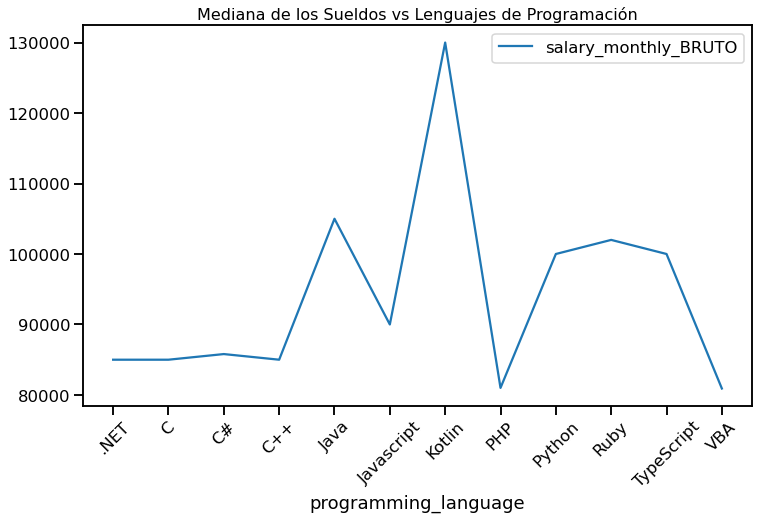

In [32]:
fig = plt.figure(figsize=(12,7))
seaborn.lineplot(data=df_aux)
plt.xticks(rotation=45)
plt.title('Mediana de los Sueldos vs Lenguajes de Programación',fontsize=16)
plt.show()

### Visualización de los Lenguajes de Programación mejores pagos

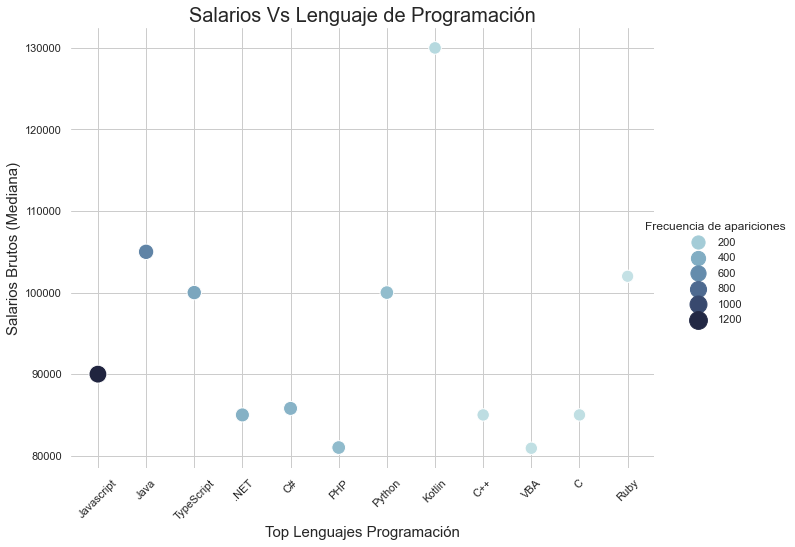

In [33]:
Marge_df = pd.merge(language_count, df_aux, on='programming_language')
Marge_df
seaborn.set_theme(style="whitegrid")

cmap = seaborn.cubehelix_palette(rot=-.2, as_cmap=True)
g = seaborn.relplot(
    data=Marge_df,
    x="programming_language", y='salary_monthly_BRUTO',
     hue="frequency", size = "frequency",
    palette=cmap,
    sizes=(150, 320)
)
g.despine(left=True, bottom=True)
g.fig.set_size_inches(12,7)
g._legend.set_title('Frecuencia de apariciones')
plt.title('Salarios Vs Lenguaje de Programación',fontsize=20)
plt.ylabel('Salarios Brutos (Mediana)',fontsize=15)
plt.xlabel('Top Lenguajes Programación',fontsize=15)
plt.xticks(rotation=45)
plt.show()

En el anterior gráfico, podemos observar en el eje de las "y" una escala de valores correspondientes al rango de los salarios brutos obtenidos para cada uno de los top lenguajes de programación (eje de las x), elegidos dentro de los desarrolladores/programadores con trabajos fulltime.

El tamaño de los puntos y su degradez de colores, representan la cantidad de apariciones dentro de nuestro dataset filtrado. Cuanto más oscuro sea el color, más son las personas que lo utilizan.

De esta forma podemos visualizar, los lenguajes de programación que representan los mejores salarios del dataset. 


---

In [34]:
Marge_df

,programming_language,frequency,salary_monthly_BRUTO
0,Javascript,1228,90000.0
1,Java,647,105000.0
2,TypeScript,440,100000.0
3,.NET,374,85000.0
4,C#,360,85800.0
5,PHP,307,81000.0
6,Python,289,100000.0
7,Kotlin,98,130000.0
8,C++,67,85000.0
9,VBA,59,80914.8


In [35]:
Marge_df['frequency'].sum()

3958

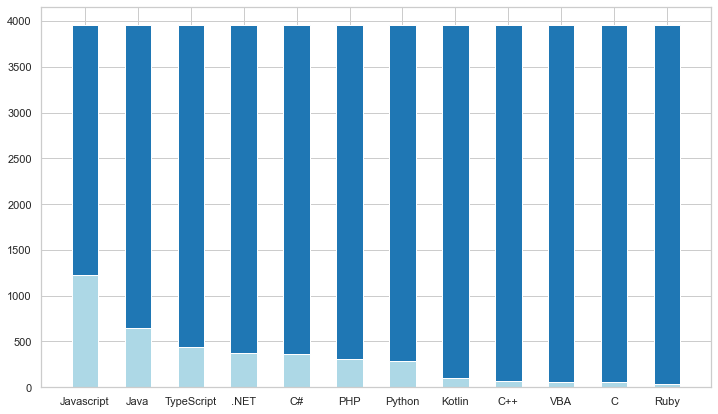

In [36]:
fig = plt.figure(figsize=(12,7))
rect1 = plt.bar(Marge_df['programming_language'], Marge_df['frequency'].sum(),
                width=0.5, color='#1f77b4')
rect2 = plt.bar(Marge_df['programming_language'] ,Marge_df['frequency'],
                width=0.5, color='lightblue')

In [37]:
filtered_df_lang[filtered_df_lang.programming_language.isin(['Ruby'])]

,programming_language,work_contract_type,work_role,tools_programming_languages,salary_monthly_BRUTO,salary_monthly_NETO,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of
156,Ruby,Full-Time,Developer,"Java, PHP, Python, Ruby, SQL",90000.00,70000.0,7.0,2.0,1.0,3
191,Ruby,Full-Time,Developer,"CSS, HTML, Java, Javascript, Ruby",108000.00,85000.0,6.0,0.0,0.0,0
206,Ruby,Full-Time,Developer,"HTML, Java, Ruby, Scala",234000.00,170000.0,10.0,3.0,3.0,0
367,Ruby,Full-Time,Developer,"Go, Javascript, Ruby",124000.00,91000.0,2.0,0.0,0.0,0
517,Ruby,Full-Time,Developer,"Javascript, Ruby, TypeScript",306000.00,202380.0,5.0,2.0,2.0,0
542,Ruby,Full-Time,Developer,"Bash/Shell, Go, Groovy, HTML, Java, Ruby, SQL",101000.00,76000.0,3.0,1.0,1.0,0
557,Ruby,Full-Time,Developer,Ruby,147200.00,108000.0,2.5,0.0,0.0,0
951,Ruby,Full-Time,Developer,Ruby,200000.00,180000.0,4.0,0.0,0.0,0
984,Ruby,Full-Time,Developer,"CSS, HTML, Javascript, Ruby",80000.00,65000.0,3.0,3.0,3.0,0
1105,Ruby,Full-Time,Developer,"HTML, Javascript, Ruby",90000.00,66000.0,3.0,3.0,3.0,0


Pre-Conclusión

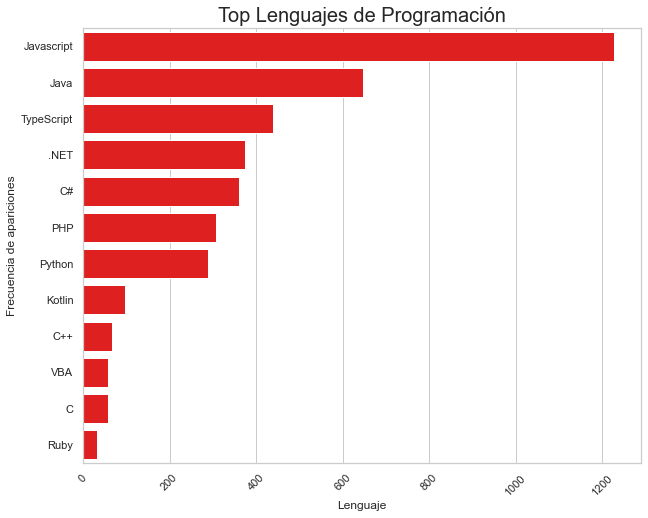

In [38]:
fig = plt.figure(figsize=(10,8))
seaborn.countplot(data=filtered_df_lang, y='programming_language', color = "red", order = filtered_df_lang['programming_language'].value_counts().index) 
plt.xticks(rotation=45)
plt.ylabel("Frecuencia de apariciones")
plt.xlabel("Lenguaje")
plt.title('Top Lenguajes de Programación',fontsize=20)
plt.show()

## Conclusión

Pregunta:
> ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?

Según nuestro análisis sobre los datos, podemos remarcar lo siguiente:

> * Entre los Lenguajes de Programación mejor pago, se encuentran aquellos que manejan "Bash/Shell" con pocas personas que lo utilizan, y sigue "Java" en segundo lugar, con un poco más de usuarios que lo manejan.
> * Entre los Lenguajes de Programación más usados, se encuentra JavaScript pero eso no quiere decir, que sea el mejor pago, ya que por encima tiene 3 lenguajes con mejor remuneración.


# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

1 - Teniendo encuenta el analisis del ejercicio 1 seleccionaremos las columnas relevantes para analizar, entre ellas estan:
profile_studies_level, 
profile_studies_level_state,
salary_in_usd,
work_contract_type,
salary_monthly_NETO 


In [39]:
col_relevantes = ['salary_monthly_NETO','salary_monthly_BRUTO', 'profile_age', 'work_contract_type', 'salary_in_usd', 'profile_studies_level', 'profile_studies_level_state','profile_years_experience','profile_open_source_contributions']

2 -  Se procedio a eliminar los valores NaN y erroneos del dataset, tambien se liminaron los valores extremos en la columna salario neto y bruto.
Para las columnas edad se eliminaron las personas con de 100 años.

In [40]:
df.dropna(subset=['salary_monthly_NETO'], inplace=True)
df.dropna(subset=['salary_monthly_BRUTO'], inplace=True)
df = df[df['salary_monthly_NETO'] > 10000]
df = df[df['salary_monthly_BRUTO'] > 10000]
max_salary = df['salary_monthly_NETO'].quantile(0.99)
max_salary_bruto = df['salary_monthly_BRUTO'].quantile(0.99)
df = df[df['salary_monthly_NETO'] < max_salary]
df = df[df['salary_monthly_BRUTO'] < max_salary_bruto]
df = df[df['profile_age'] < 65]

In [41]:
df = df[col_relevantes]
df

,salary_monthly_NETO,salary_monthly_BRUTO,profile_age,work_contract_type,salary_in_usd,profile_studies_level,profile_studies_level_state,profile_years_experience,profile_open_source_contributions
1,63000.0,79000.0,29,Full-Time,NaN,Universitario,En curso,5.0,No
3,102000.0,130000.0,39,Full-Time,NaN,Posgrado,Incompleto,15.0,Sí
4,106000.0,140000.0,32,Full-Time,NaN,Universitario,En curso,9.0,No
5,44000.0,54000.0,25,Full-Time,NaN,Terciario,Incompleto,1.0,No
6,62400.0,75000.0,33,Full-Time,NaN,Universitario,Incompleto,1.0,Sí
...,...,...,...,...,...,...,...,...,...
6086,82000.0,120000.0,52,Full-Time,NaN,Universitario,Incompleto,23.0,No
6087,120000.0,150000.0,43,Full-Time,NaN,Universitario,Incompleto,25.0,Sí
6088,56450.0,69000.0,32,Full-Time,NaN,Secundario,Completado,13.0,No
6089,130000.0,180000.0,32,Full-Time,NaN,Universitario,Completado,10.0,No


ya tenemos el data set listo para ser analizado.

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa





Variables numericas: salary_monthly_NETO y profile_age
Variables categoricas: work_contract_type y salary_in_usd

Para estudiar variables cateogircas podemos utilizar ???????
Para estudiar variables numericas podemos utilizar ???????

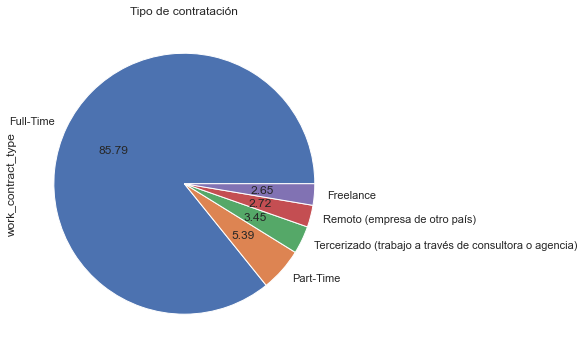

In [42]:
plot = df['work_contract_type'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Tipo de contratación')



In [43]:
#Para un mejor analisis convertiremos la columna salario en dolares en verdaderos o falsos
df['salary_in_usd2'] = df['salary_in_usd'].notna()


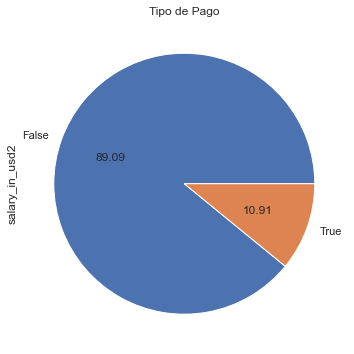

In [44]:
plot = df['salary_in_usd2'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Tipo de Pago')

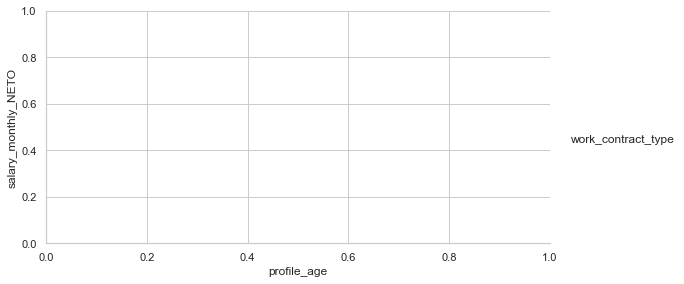

In [45]:
seaborn.pairplot(data=df,
                 x_vars='profile_age',
                 y_vars='salary_monthly_NETO',
                 hue='work_contract_type',
                 aspect=2, height=4);


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='work_contract_type', ylabel='salary_monthly_NETO'>

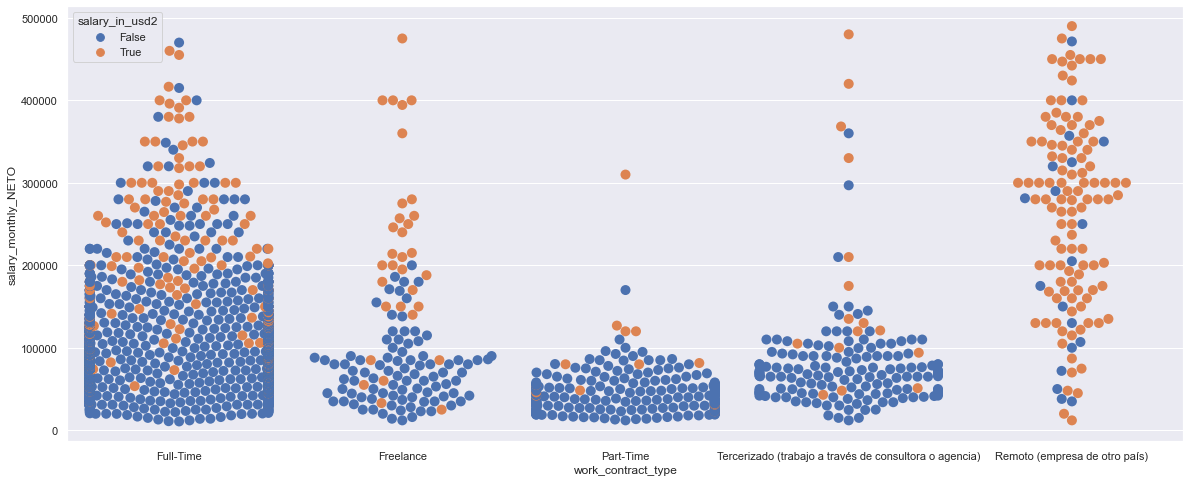

In [46]:
seaborn.set(rc = {'figure.figsize':(20,8)})
seaborn.swarmplot( x='work_contract_type',
                y='salary_monthly_NETO',
                hue='salary_in_usd2', data=df, size=10)

Podemos observar como el salario con respecto a la edad y el tipo de contrato varia.
##----- no se que mas poner no tengo chamuyo

## b) Asociación

Necesitamos decidir si sacar o no la columna de salario bruto, para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el salario neto? ¿Qué abordaje y medidas utilizaría?

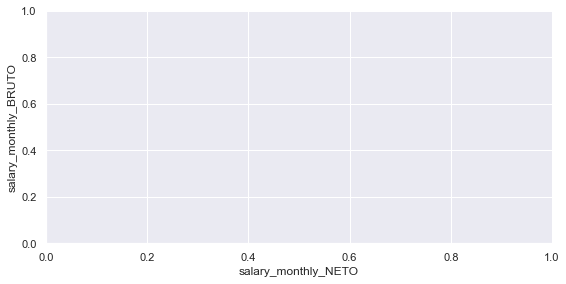

In [47]:
seaborn.pairplot(data=df,
                 x_vars='salary_monthly_NETO',
                 y_vars='salary_monthly_BRUTO',
                 aspect=2, height=4);

In [48]:
df[['salary_monthly_NETO', 'salary_monthly_BRUTO']].corr()

,salary_monthly_NETO,salary_monthly_BRUTO
salary_monthly_NETO,1.000000,0.946546
salary_monthly_BRUTO,0.946546,1.000000


El grafico nos permite visualizar una correlacion entre salario neto y bruto, la dispercion de puntos se asemeja a una recta y en la tabla de correlacion podemos observar que ambos  obtienen un valor cercano a 1, lo que nos hace entender que existe una correlacion

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija **dos** subpoblaciones numerosas), y grafique de manera comparativa ambos histogramas de la variable `salary_monthly_NETO`.
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación.

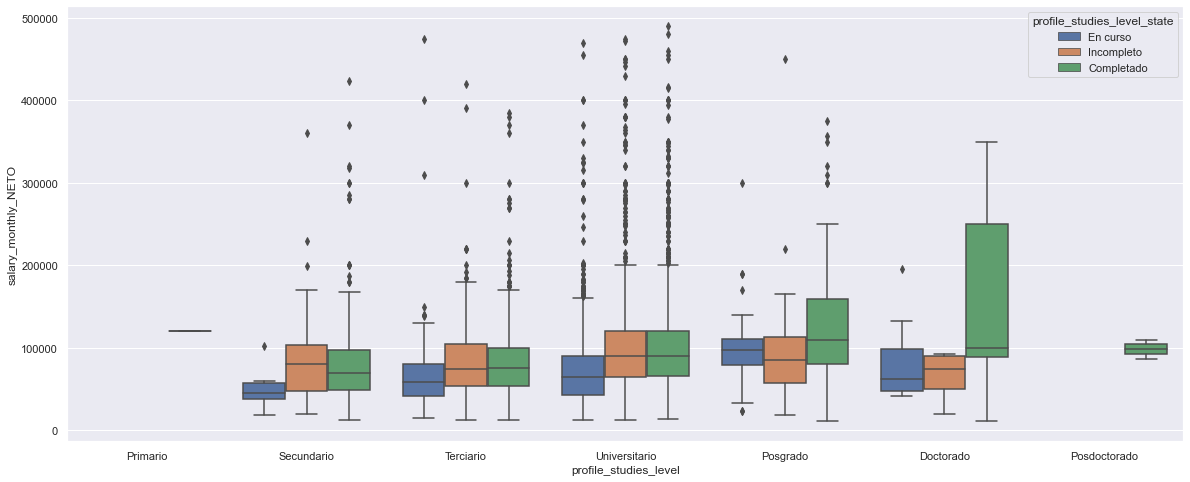

In [49]:
seaborn.boxplot(data=df,
                x= 'profile_studies_level', 
                y='salary_monthly_NETO',
                hue='profile_studies_level_state',
                order = [ 'Primario', 'Secundario', 'Terciario', 'Universitario', 'Posgrado', 'Doctorado', 'Posdoctorado']);

In [50]:
agrupacion_x_nivel = {
    'Primario': 'No Universitario',
    'Secundario': 'No Universitario',
    'Terciario': 'No Universitario',
    'Universitario': 'Universitario',
    'Posgrado': 'Universitario',
    'Doctorado': 'Universitario',
    'Posdoctorado': 'Universitario'
}
estudios = df['profile_studies_level'].replace(agrupacion_x_nivel)

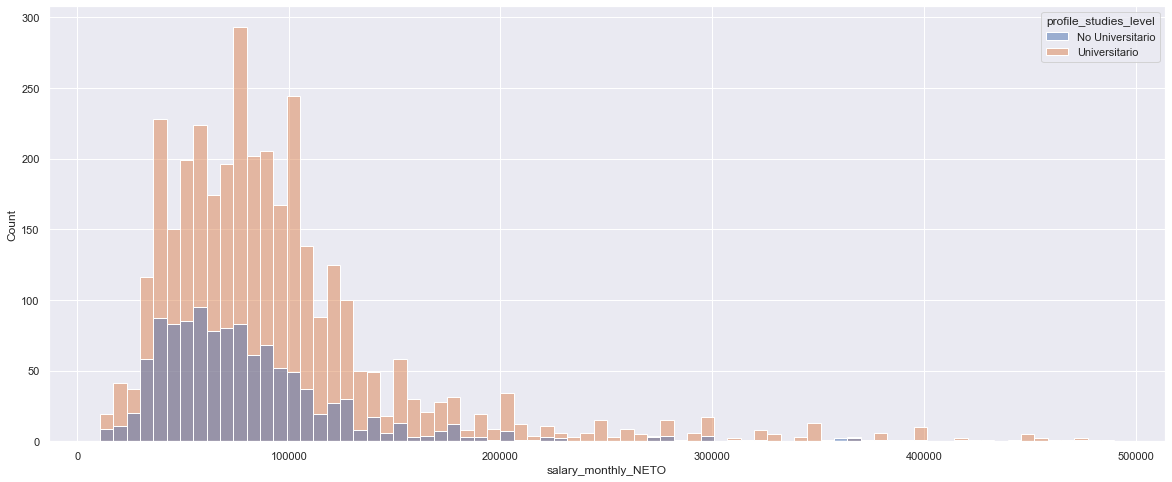

In [51]:
seaborn.histplot(df,
                 x='salary_monthly_NETO',
                 hue=estudios,
                 hue_order = ['No Universitario','Universitario']);

## d) Densidad conjunta condicional

Elija dos variables **numéricas** y una variable **categórica**.
Estudie la dispersión (*scatterplot*) de las dos variables numéricas, discriminando en color por la variable categórica (**hue** en *seaborn*).

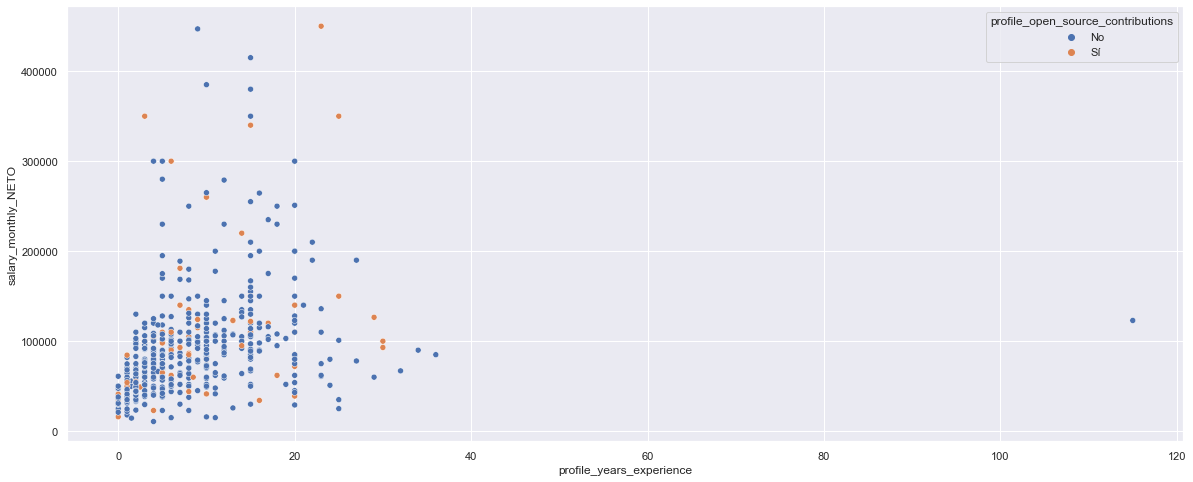

In [52]:
#['salary_monthly_NETO','salary_monthly_BRUTO', 'profile_age', 'work_contract_type', 'salary_in_usd', 'profile_studies_level', 'profile_studies_level_state','profile_years_experience']


seaborn.scatterplot(data=df.sample(500),
                    x='profile_years_experience',
                    y='salary_monthly_NETO',
                    hue='profile_open_source_contributions');

Variables Numéricas: `salary_monthly_NETO` y `profile_years_experience`.Variables Categóricas: `profile_open_source_contributions`